# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

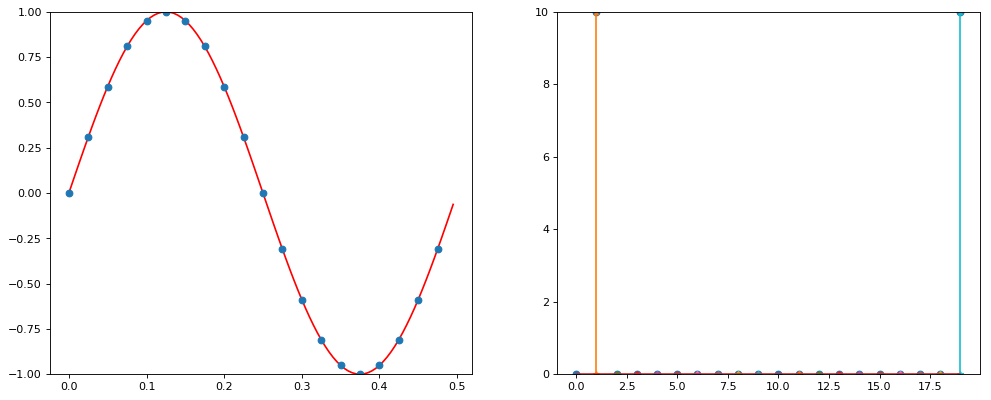

In [3]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czśstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

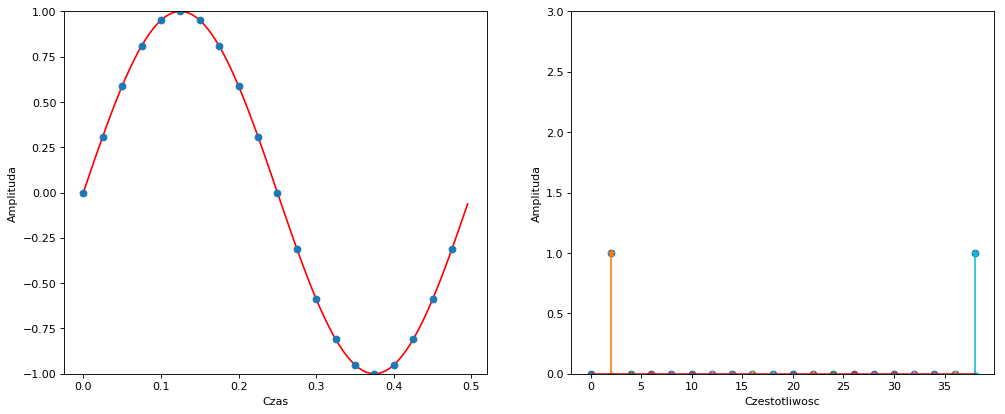

In [13]:
# Zdefiniuj funckję
def myFunc(A=1,LP=1,w=40,f=2.0):
    
#     A = 1
#     # Amplituda sygnału

#     LP = 1 
#     # Liczba analizowanych pełnych przebiegów sygnału (okresów)
#     w = 40           
#     # czśstotliwość probkowania [Hz] sygnału 
#     #(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

#     f = 2.0           
#     # Czestotliwosc sygnalu [Hz]

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)   
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [ x / LP * f for x in freqs ]


    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")

    show()
myFunc()

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

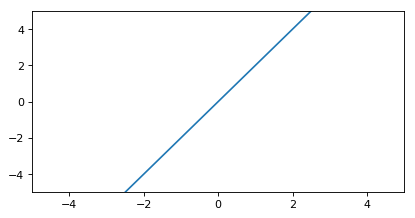

<function __main__.prosta>

In [3]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

b) Zmień częstotliwość próbkowania na 50Hz.

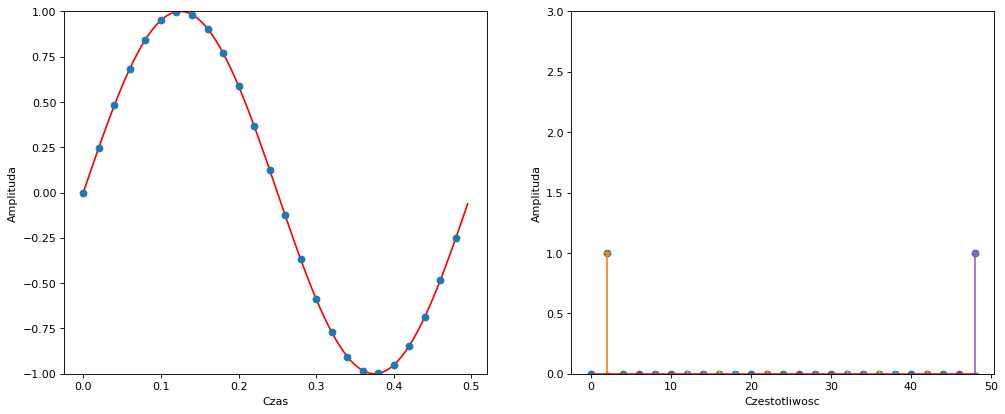

In [14]:
myFunc(w=50)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

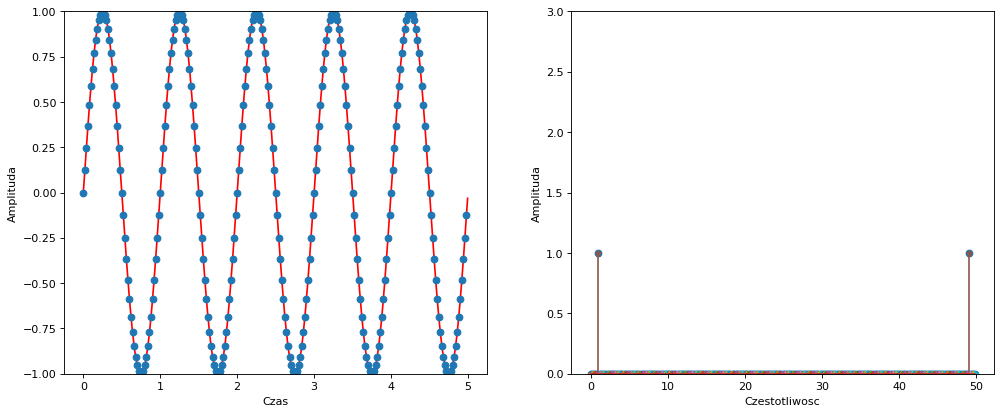

In [15]:
myFunc(LP=5,f=1,w=50)

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

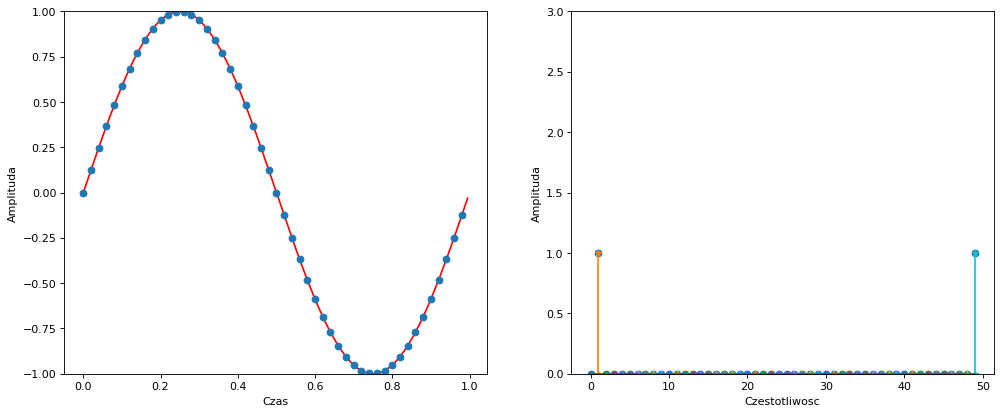

In [16]:
myFunc(f=1,w=50)

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

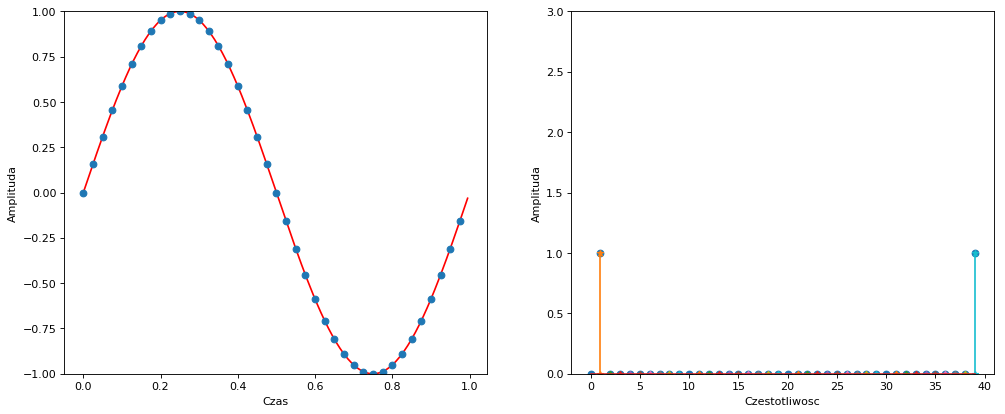

In [17]:
myFunc(f=1, A=1, LP=1)

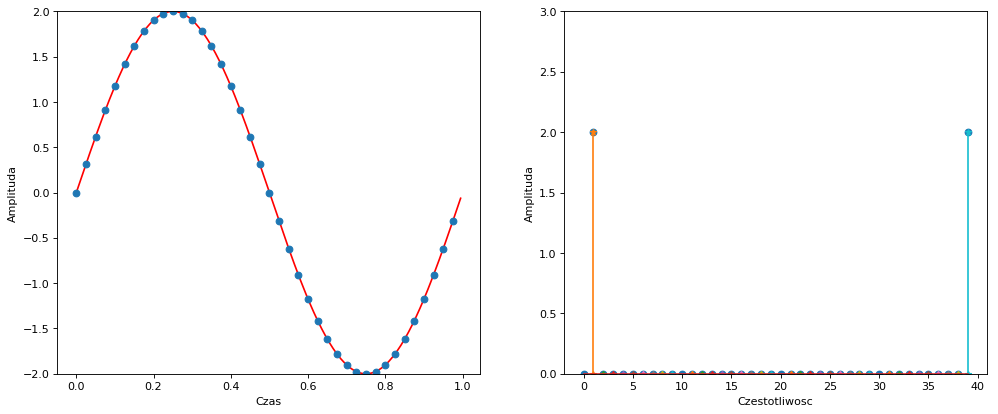

In [18]:
myFunc(f=1, A=2, LP=1)

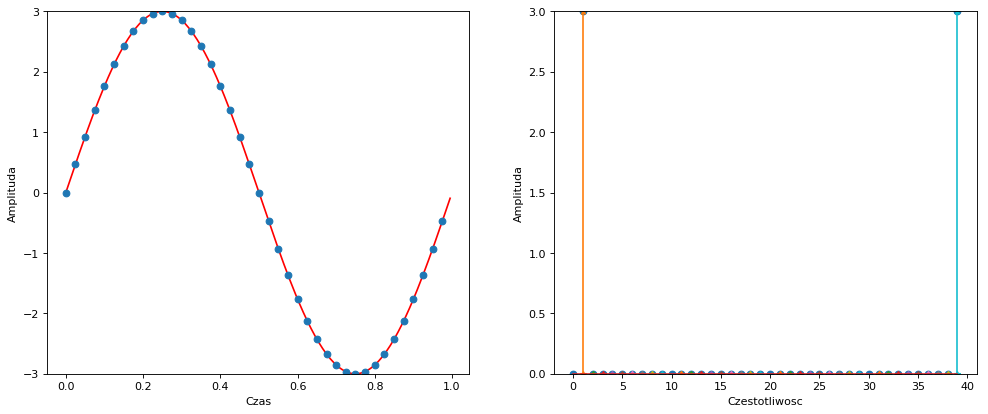

In [19]:
myFunc(f=1, A=3, LP=1)

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

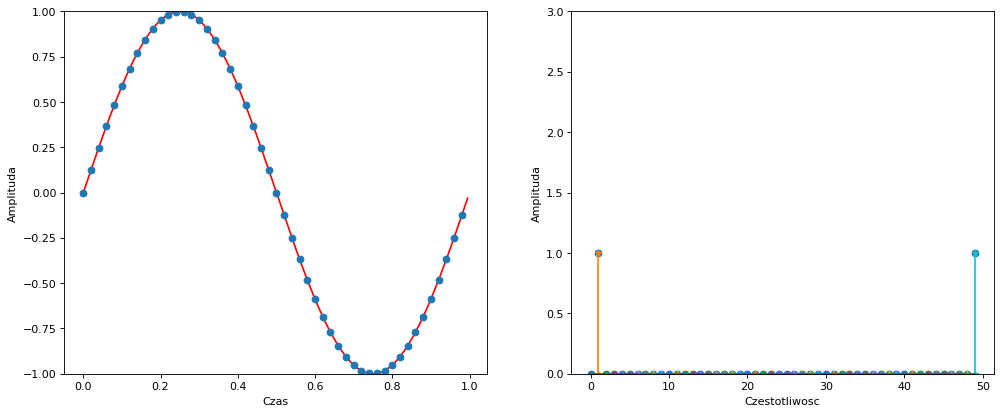

In [20]:
myFunc(f=1, w=50, LP=1)

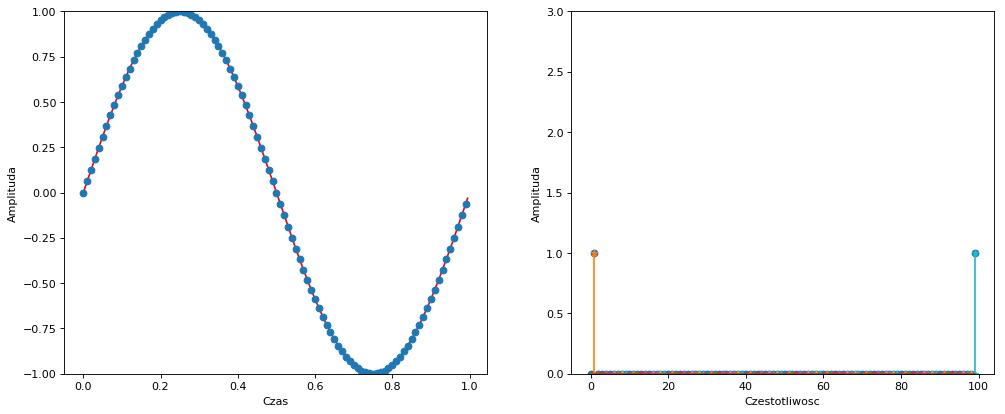

In [21]:
myFunc(f=1, w=100, LP=1)

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

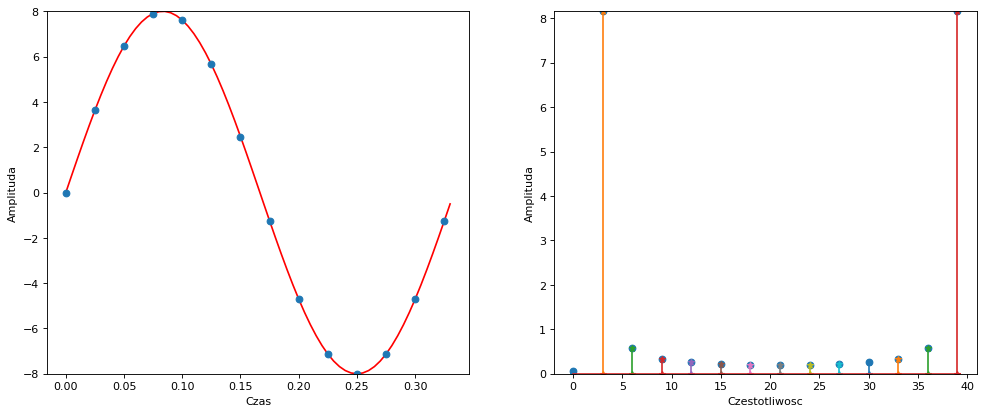

In [22]:
myFunc(f=3, A=8, LP=1)

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

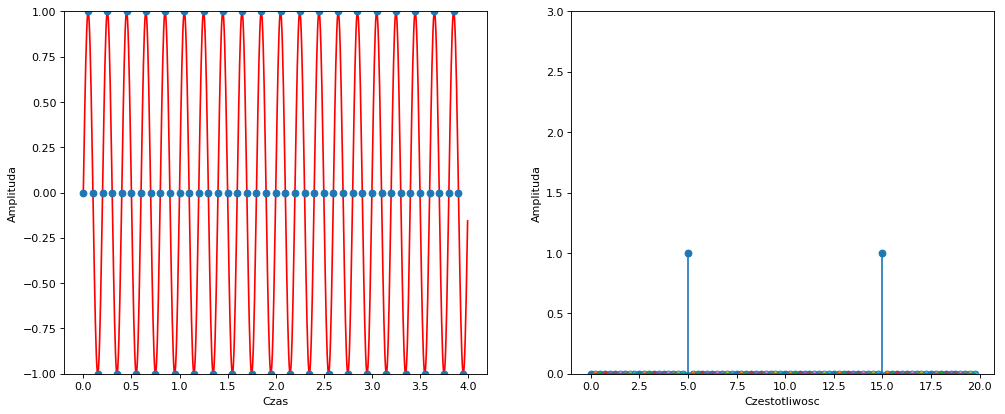

In [23]:
myFunc(f=5, w=20, LP=20)

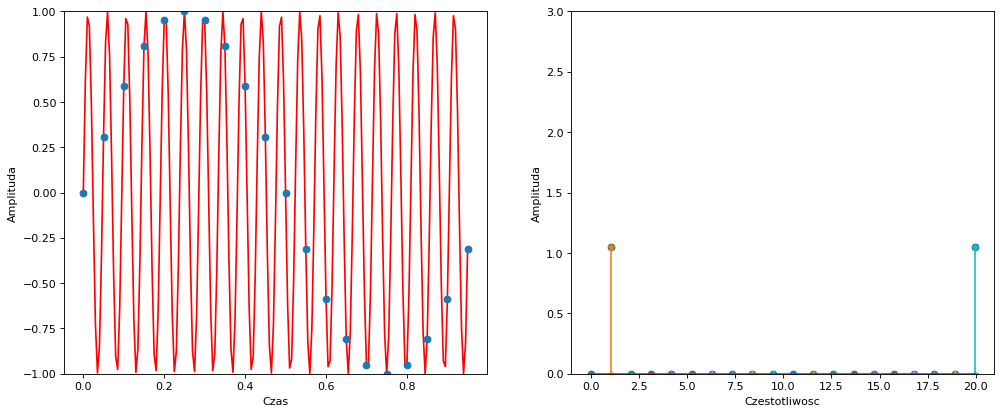

In [26]:
myFunc(f=21, w=20, LP=20)

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

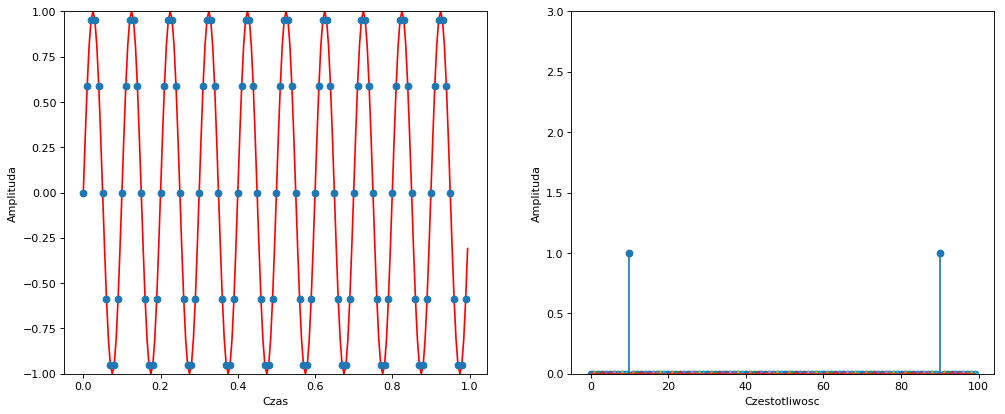

In [27]:
myFunc(f=10, w=100, A=1, LP=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

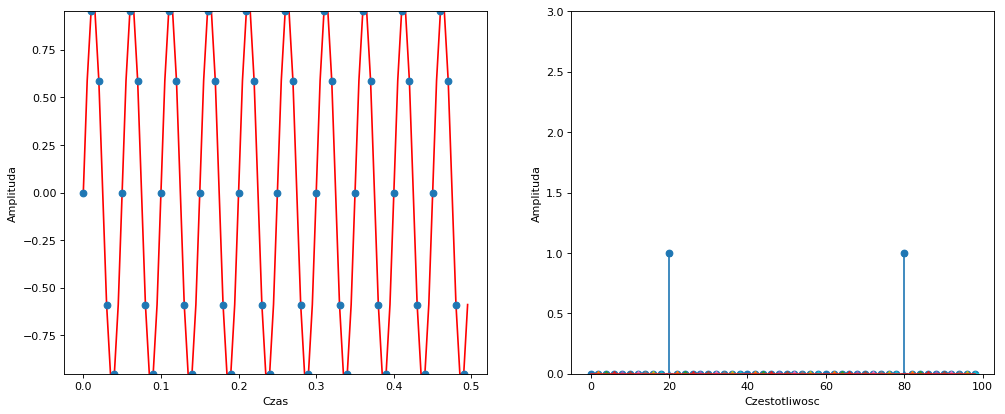

In [28]:
myFunc(f=20, w=100, A=1, LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

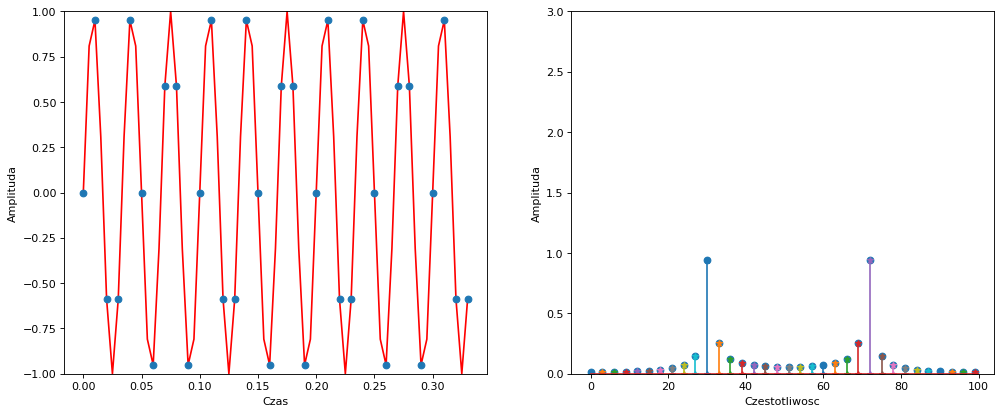

In [29]:
myFunc(f=30, w=100, A=1, LP=10)

iv) $sin(2*pi*t*f)$, $f=40Hz$

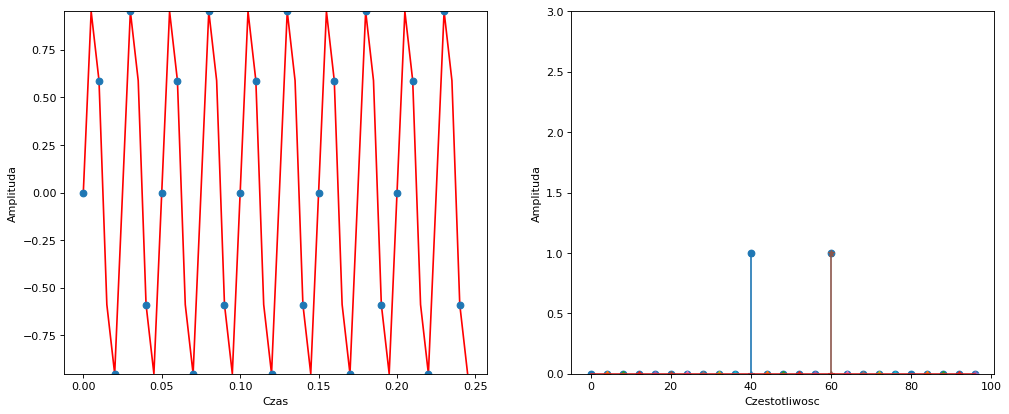

In [30]:
myFunc(f=40, w=100, A=1, LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

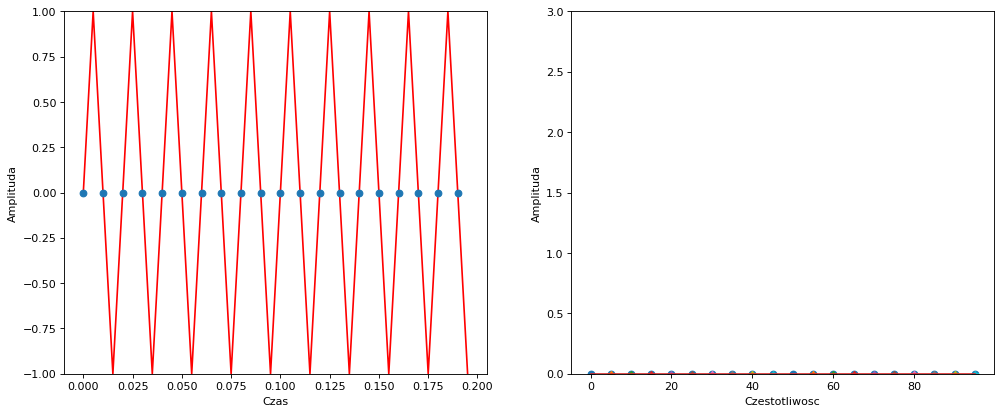

In [31]:
myFunc(f=50, w=100, A=1, LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

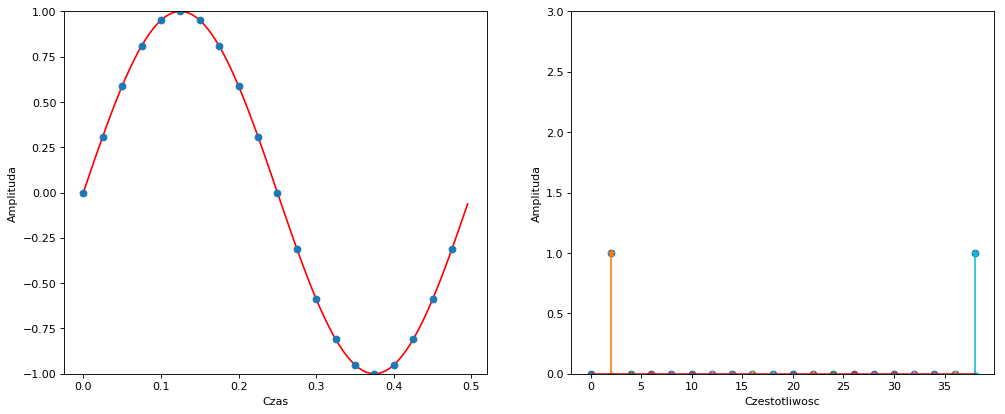

In [32]:
# Zdefiniuj funckję
def myFunc2(iloscFunkcji=1,A={1},LP={1},w={40},f={2}):
    
#     A = 1
#     # Amplituda sygnału

#     LP = 1 
#     # Liczba analizowanych pełnych przebiegów sygnału (okresów)
#     w = 40           
#     # czśstotliwość probkowania [Hz] sygnału 
#     #(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

#     f = 2.0           
#     # Czestotliwosc sygnalu [Hz]

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)   
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [ x / LP * f for x in freqs ]


    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")

    show()
myFunc()

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

In [ ]:
# Wyrysuj sygnał


e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

In [ ]:
# faza = 0


In [ ]:
# faza = pi/4


# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [ ]:
# wygeneruj wektor x


In [ ]:
# oblicz fft z x


In [ ]:
# oblicz ifft

In [ ]:
#porownaj x z ifft(fft(x)), wystarczy print